In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("/content/exchange_rate.xlsx")
df

,date,Ex_rate
0,1990-01-01,0.785500
1,1990-01-02,0.781800
2,1990-01-03,0.786700
3,1990-01-04,0.786000
4,1990-01-05,0.784900
...,...,...
7583,2010-10-06,0.718494
7584,2010-10-07,0.721839
7585,2010-10-08,0.723197
7586,2010-10-09,0.720825


In [4]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     7588 non-null   datetime64[ns]
 1   Ex_rate  7588 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 118.7 KB


In [5]:
df.isnull().sum()


,0
date,0
Ex_rate,0


In [6]:
df.duplicated().sum()


np.int64(0)

In [7]:
df['date'] = pd.to_datetime(df['date'])


In [8]:
df.set_index('date', inplace=True)


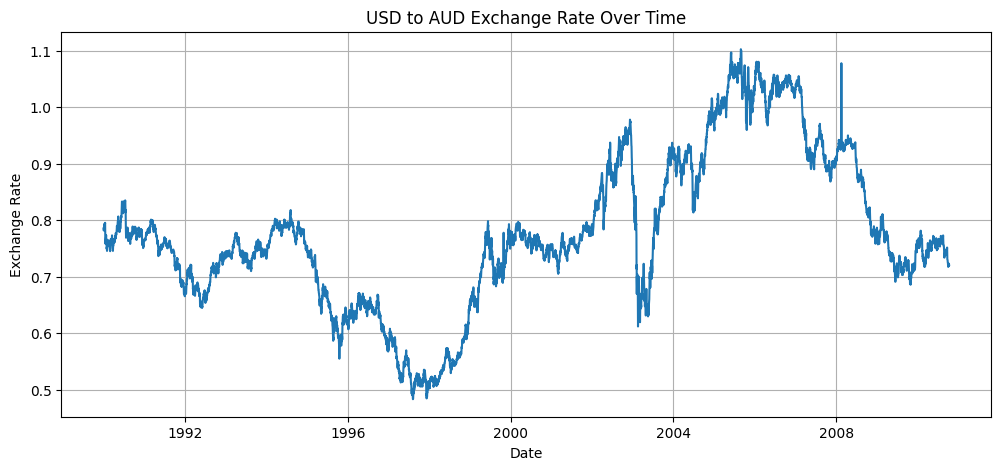

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df['Ex_rate'])
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()


In [10]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Ex_rate'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -1.6649941807382342
p-value: 0.4492327353597477


In [11]:
df_diff = df['Ex_rate'].diff().dropna()


In [17]:
%pip install pmdarima

In [25]:

from statsmodels.tsa.arima.model import ARIMA
p = 10
q = 12
r = 20
model = ARIMA(df['Ex_rate'], order=(p,q,r))  # Replace with suggested values
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:              ARIMA(10, 12, 20)   Log Likelihood               14871.697
Date:                Sun, 29 Jun 2025   AIC                         -29681.395
Time:                        18:27:30   BIC                         -29466.480
Sample:                    01-01-1990   HQIC                        -29607.632
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -7.3681      0.003  -2486.787      0.000      -7.374      -7.362
ar.L2        -26.1779      0.019  -1343.609      0.000     -26.216     -26.140
ar.L3        -58.9305      0.062   -947.480      0.0

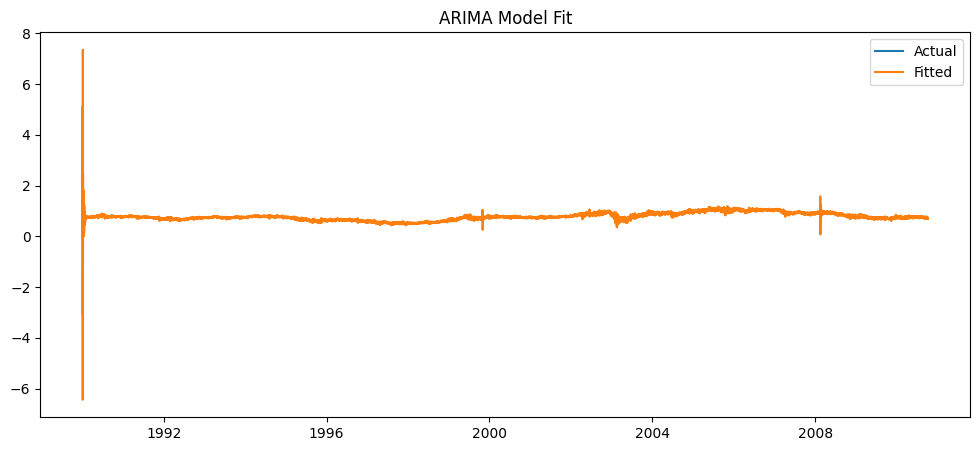

In [27]:
df['forecast'] = model_fit.fittedvalues

plt.figure(figsize=(12,5))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(df['forecast'], label='Fitted')
plt.title('ARIMA Model Fit')
plt.legend()
plt.show()


In [28]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

ses_model = SimpleExpSmoothing(df['Ex_rate']).fit()
df['SES_forecast'] = ses_model.fittedvalues


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [29]:
from statsmodels.tsa.holtwinters import Holt

holt_model = Holt(df['Ex_rate']).fit()
df['Holt_forecast'] = holt_model.fittedvalues


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None).fit()
df['HW_forecast'] = hw_model.fittedvalues


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# ARIMA
mae_arima = mean_absolute_error(df['Ex_rate'], df['forecast'])
rmse_arima = np.sqrt(mean_squared_error(df['Ex_rate'], df['forecast']))

# Holt-Winters
mae_hw = mean_absolute_error(df['Ex_rate'], df['HW_forecast'])
rmse_hw = np.sqrt(mean_squared_error(df['Ex_rate'], df['HW_forecast']))

print(f'ARIMA -> MAE: {mae_arima:.4f}, RMSE: {rmse_arima:.4f}')
print(f'Holt-Winters -> MAE: {mae_hw:.4f}, RMSE: {rmse_hw:.4f}')


ARIMA -> MAE: 0.0263, RMSE: 0.1379
Holt-Winters -> MAE: 0.0037, RMSE: 0.0060


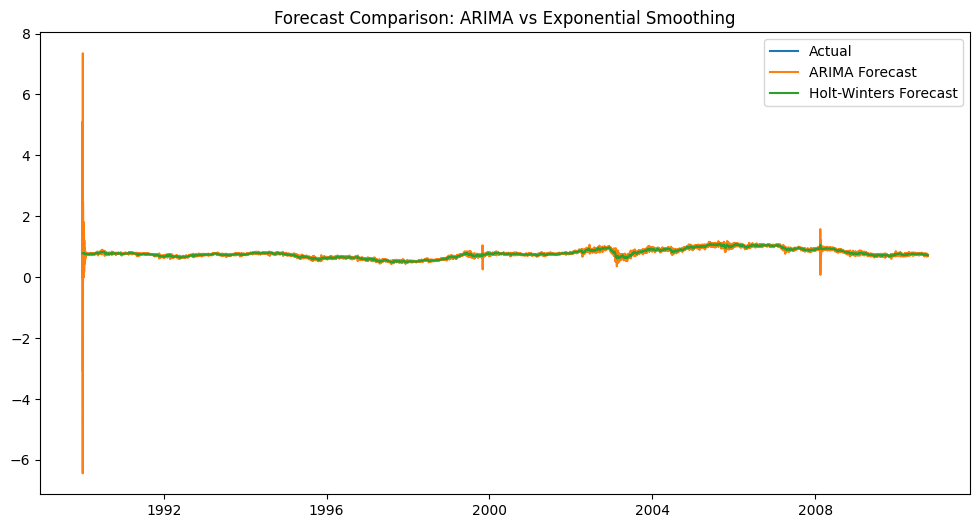

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(df['forecast'], label='ARIMA Forecast')
plt.plot(df['HW_forecast'], label='Holt-Winters Forecast')
plt.legend()
plt.title('Forecast Comparison: ARIMA vs Exponential Smoothing')
plt.show()
